# The Monty Hall problem
In this excersice, we are going to simulate (in)famous prabability puzzle, **The Monthy Hall Problem**.

> Suppose you're on a game show, and you're given the choice of three doors:
- Behind one door is a car; behind the others, goats.
- The player pick a door. Then, the host Monty Hall, who knows what's behind the doors, will open one of the doors that has not been chosen, thus revealing a goat (he obviously won't open the car door).
- He then says to you, "Do you want to switch to the other door?"

Is it to your advantage to switch your choice?.

In [3]:
! pip install ipympl
! apt install fonts-humor-sans
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import matplotlib.pyplot as plt
import functools
from numpy.random import choice
from google.colab import drive

drive.mount('/content/drive')
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/INDP 2023')

import helper_visualize as vis;

The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, we are going to define few helper functions for game design.
1. `select_random_door` will randomly choose one door from a list with given probability (By default with uniform probability)
2. `good_monty_opens_door` will simulate our host Monty by selecting one door from doors that are not chosen.
Remeber, here, our host Monty is well aware of the rule and he will not open a door that contains a prize!

And two functions simulating a player with different strategies
1. `player_switches` will simulate a player who always decides to switch
2. `player_stay` will simulate a player who always stay with the original choice

In [4]:
def select_random_door(door_list, prob=None):
    """
    Randomly choose one door from a list with given probability

    Parameters
    ----------
    door_list : list of doors
    prob: probability of choosing each door

    Returns
    ----------
    the door behind which the prize is hidden
    """
    # If no probability is given, all doors are equally likely to be chosen
    if prob is None:
        prob = np.ones(len(door_list)) / len(door_list)

    door_choice = choice(door_list, p=prob)

    return str(door_choice)


def good_monty_opens_door(player_choice, prize_door):
    """
    Randomly choose one door to remove from a list of doors that
    1. the player did not choose and
    2. does not contain the prize

    Parameters
    ----------
    player_choice : door chosen by the player
    prize_door : door behind which the prize is hidden

    Returns
    ----------
    the door that will be opened by Monty
    """
    possible_choices = list_of_doors.copy()

    # Monty will not open the door that the player chose, so we remove it
    possible_choices.remove(player_choice)

    # Monty will not open the prize door, so we remove it
    if prize_door in possible_choices:
        possible_choices.remove(prize_door)

    # Select a door from the remaining possible choices
    door_choice = select_random_door(possible_choices)

    return str(door_choice)


def player_switches(player_choice, monty_door):
    """
    Randomly choose one door to switch to from a list of doors that
    1. the player did not choose and
    2. Monty did not open

    Parameters
    ----------
    player_choice : door chosen by the player
    monty_door : door opened by Monty

    Returns
    ----------
    the door that the player will switch to
    """
    possible_choices = list_of_doors.copy()

    # Player will not open the door that the player chose, so we remove it
    possible_choices.remove(player_choice)

    # Monty will not open the prize door, so we remove it
    if monty_door in possible_choices:
        possible_choices.remove(monty_door)

    # Select a door from the remaining possible choices
    door_choice = select_random_door(possible_choices)

    return str(door_choice)


def player_stays(player_choice, monty_door):
    """
    The player stays with their original choice

    Parameters
    ----------
    player_choice : door chosen by the player

    Returns
    ----------
    the door that the player will stay with
    """
    return str(player_choice)

In [5]:
def play_montyhall(door_list, player_strategy, verbose=False):
    prize_door = select_random_door(door_list)
    player_initial_door = select_random_door(door_list)

    monty_door = good_monty_opens_door(player_initial_door, prize_door)
    player_final_door = player_strategy(player_initial_door, monty_door)

    if verbose:
        if player_final_door == prize_door:
            print(
                f"Congratulation! \n You selected {player_final_door} and the prize was behind {prize_door}!"
            )
        else:
            print(
                f"Sorry! \n You selected {player_final_door} but the prize was behind {prize_door}!"
            )

    return 1 if player_final_door == prize_door else 0

False

findfont: Font family ['Humor Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Humor Sans'] not found. Falling back to DejaVu Sans.


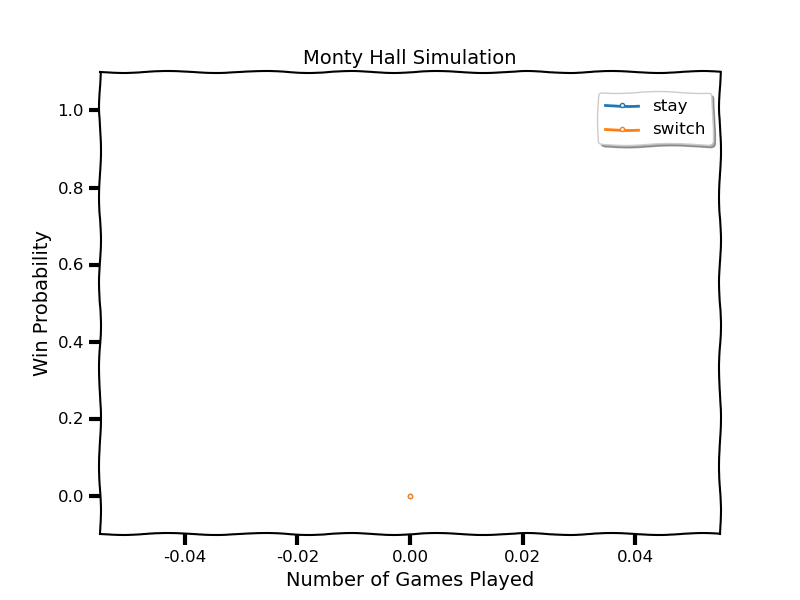

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.6666666269302368, 'type': 'set_device_pixel_ratio'}


In [6]:
def run_montyhall_experiment(door_list):
    run_stay = ("stay", functools.partial(play_montyhall, door_list, player_stays))
    run_switch = ("switch", functools.partial(play_montyhall, door_list, player_switches))

    vis.visualize_simulation(
        [run_stay, run_switch],
        ylabel="Win Probability",
        xlabel="Number of Games Played",
        title=f"Monty Hall Simulation",
    )


list_of_doors = ["A", "B", "C"]
run_montyhall_experiment(list_of_doors)

Does it matter which door Monty opened?
i.e. What is the probability of winning for the player using switching strategy when Monty opened the door 'B'?

Let's assume that our host Monty who is standing next to door 'A' is very lazy.
Instead of randomly selecting door to open, he just opens door that are close to him

This time we are going to
In this game, player are forced to take either 'switch' or 'stay' strategy. So even in a case where Monty accidently opens the prize door (and player lost), the game continues!

This time we are going to
In this game, player are forced to take either 'switch' or 'stay' strategy. So even in a case where Monty accidently opens the prize door (and player lost), the game continues!